<a href="https://colab.research.google.com/github/HarshTiwari0722/My-first-repository/blob/main/task_1%2C2%2C3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generating synthetic house data...

Dataset Info:
Shape: (1000, 4)

First 5 rows:
          sqft  bedrooms  bathrooms          price
0  2397.371322         2        1.5  314517.051320
1  1889.388559         2        1.0  270008.719395
2  2518.150830         3        1.0  385180.073568
3  3218.423885         4        2.0  449913.305028
4  1812.677300         1        3.0  209607.458376

Dataset Statistics:
              sqft     bedrooms    bathrooms          price
count  1000.000000  1000.000000  1000.000000    1000.000000
mean   2021.625912     2.956000     2.215500  304841.334386
std     768.732158     1.035923     0.802779   97030.426024
min     500.000000     1.000000     1.000000   75130.469907
25%    1481.927756     2.000000     2.000000  237825.731083
50%    2020.240490     3.000000     2.000000  307732.860379
75%    2518.355100     4.000000     2.500000  370426.559780
max    5000.000000     5.000000     4.000000  608593.841663


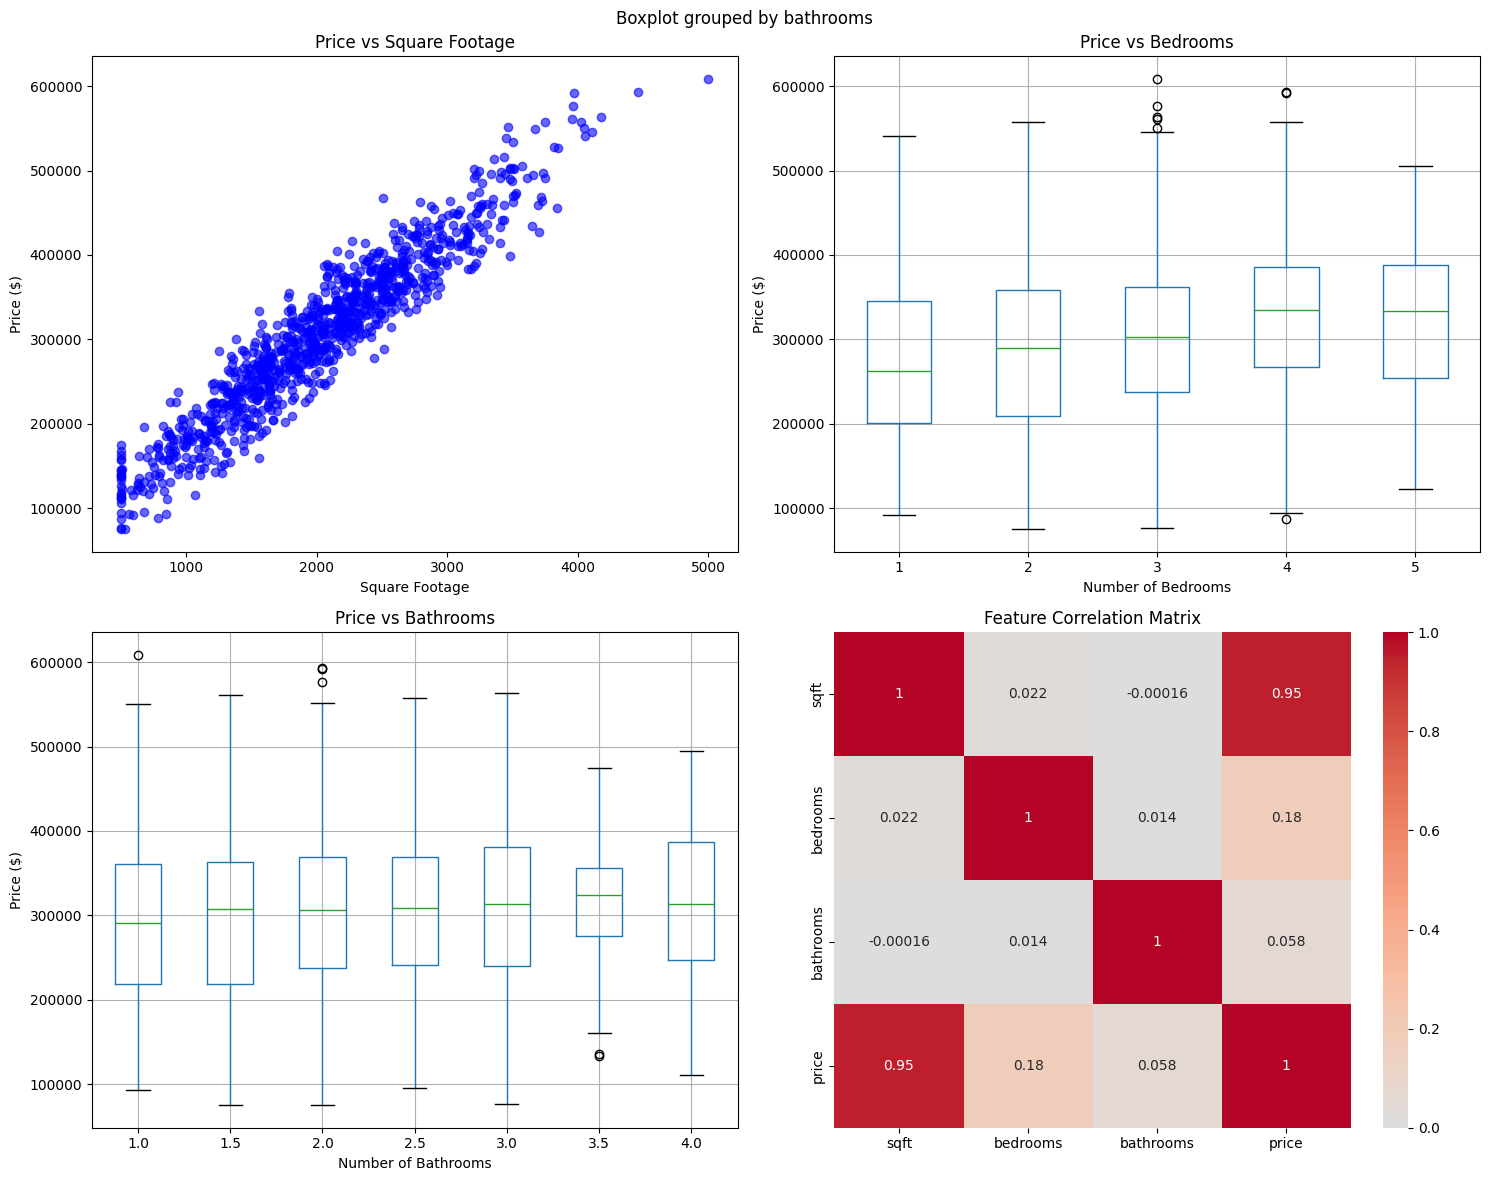


Feature matrix shape: (1000, 3)
Target vector shape: (1000,)

Training set size: 800 samples
Testing set size: 200 samples

Model trained successfully!

MODEL EVALUATION RESULTS

Training Set Performance:
  Mean Squared Error (MSE): $647,859,780.81
  Root Mean Squared Error (RMSE): $25,453.09
  Mean Absolute Error (MAE): $20,486.16
  R² Score: 0.9316

Test Set Performance:
  Mean Squared Error (MSE): $700,121,547.21
  Root Mean Squared Error (RMSE): $26,459.81
  Mean Absolute Error (MAE): $21,402.68
  R² Score: 0.9234

Model Coefficients:
  Square Footage: $119.94
  Bedrooms: $14,630.24
  Bathrooms: $6,521.93
  Intercept: $4,208.25


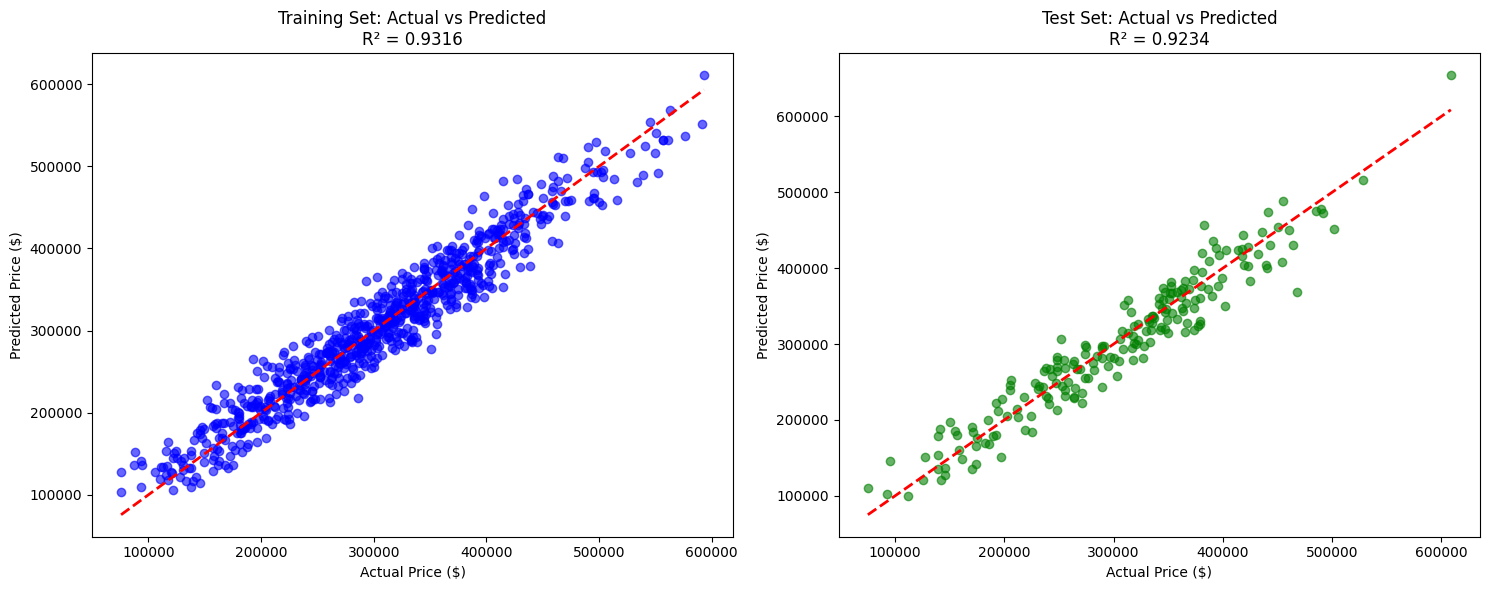


EXAMPLE PREDICTIONS
House: 1500 sqft, 3 bed, 2 bath → Predicted Price: $241,047.11
House: 2500 sqft, 4 bed, 3 bath → Predicted Price: $382,135.45
House: 1200 sqft, 2 bed, 1 bath → Predicted Price: $183,914.08
House: 3000 sqft, 5 bed, 4 bath → Predicted Price: $463,255.72

MODEL INTERPRETATION

The model suggests that:
• Each additional square foot adds approximately $119.94 to the house price
• Each additional bedroom adds approximately $14,630.24 to the house price
• Each additional bathroom adds approximately $6,521.93 to the house price
• The base price (intercept) is $4,208.25

Model Performance Summary:
• R² Score of 0.9234 indicates excellent model performance
• The model explains 92.3% of the variance in house prices
• Average prediction error is $21,402.68


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic house data
def generate_house_data(n_samples=1000):
    """Generate synthetic house data for demonstration"""

    # Generate features
    sqft = np.random.normal(2000, 800, n_samples)  # Square footage
    sqft = np.clip(sqft, 500, 5000)  # Reasonable range

    bedrooms = np.random.choice([1, 2, 3, 4, 5], n_samples, p=[0.1, 0.2, 0.4, 0.25, 0.05])
    bathrooms = np.random.choice([1, 1.5, 2, 2.5, 3, 3.5, 4], n_samples,
                                p=[0.15, 0.1, 0.3, 0.2, 0.15, 0.05, 0.05])

    # Create price with realistic relationships
    # Base price influenced by square footage, bedrooms, and bathrooms
    price = (sqft * 120 +  # $120 per sqft base
             bedrooms * 15000 +  # $15k per bedroom
             bathrooms * 8000 +  # $8k per bathroom
             np.random.normal(0, 25000, n_samples))  # Random noise

    # Ensure positive prices
    price = np.clip(price, 50000, 1000000)

    return pd.DataFrame({
        'sqft': sqft,
        'bedrooms': bedrooms,
        'bathrooms': bathrooms,
        'price': price
    })

# Generate the dataset
print("Generating synthetic house data...")
df = generate_house_data(1000)

# Display basic information about the dataset
print("\nDataset Info:")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Statistics:")
print(df.describe())

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Square footage vs Price
axes[0, 0].scatter(df['sqft'], df['price'], alpha=0.6, color='blue')
axes[0, 0].set_xlabel('Square Footage')
axes[0, 0].set_ylabel('Price ($)')
axes[0, 0].set_title('Price vs Square Footage')

# Bedrooms vs Price
df.boxplot(column='price', by='bedrooms', ax=axes[0, 1])
axes[0, 1].set_xlabel('Number of Bedrooms')
axes[0, 1].set_ylabel('Price ($)')
axes[0, 1].set_title('Price vs Bedrooms')

# Bathrooms vs Price
df.boxplot(column='price', by='bathrooms', ax=axes[1, 0])
axes[1, 0].set_xlabel('Number of Bathrooms')
axes[1, 0].set_ylabel('Price ($)')
axes[1, 0].set_title('Price vs Bathrooms')

# Correlation heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1, 1])
axes[1, 1].set_title('Feature Correlation Matrix')

plt.tight_layout()
plt.show()

# Prepare features (X) and target (y)
X = df[['sqft', 'bedrooms', 'bathrooms']]
y = df['price']

print("\nFeature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("\nModel trained successfully!")

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("\n" + "="*50)
print("MODEL EVALUATION RESULTS")
print("="*50)

print(f"\nTraining Set Performance:")
print(f"  Mean Squared Error (MSE): ${train_mse:,.2f}")
print(f"  Root Mean Squared Error (RMSE): ${np.sqrt(train_mse):,.2f}")
print(f"  Mean Absolute Error (MAE): ${train_mae:,.2f}")
print(f"  R² Score: {train_r2:.4f}")

print(f"\nTest Set Performance:")
print(f"  Mean Squared Error (MSE): ${test_mse:,.2f}")
print(f"  Root Mean Squared Error (RMSE): ${np.sqrt(test_mse):,.2f}")
print(f"  Mean Absolute Error (MAE): ${test_mae:,.2f}")
print(f"  R² Score: {test_r2:.4f}")

# Display model coefficients
print(f"\nModel Coefficients:")
feature_names = ['Square Footage', 'Bedrooms', 'Bathrooms']
for i, (feature, coef) in enumerate(zip(feature_names, model.coef_)):
    print(f"  {feature}: ${coef:,.2f}")
print(f"  Intercept: ${model.intercept_:,.2f}")

# Create prediction vs actual plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Training set predictions
axes[0].scatter(y_train, y_train_pred, alpha=0.6, color='blue')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Price ($)')
axes[0].set_ylabel('Predicted Price ($)')
axes[0].set_title(f'Training Set: Actual vs Predicted\nR² = {train_r2:.4f}')

# Test set predictions
axes[1].scatter(y_test, y_test_pred, alpha=0.6, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Price ($)')
axes[1].set_ylabel('Predicted Price ($)')
axes[1].set_title(f'Test Set: Actual vs Predicted\nR² = {test_r2:.4f}')

plt.tight_layout()
plt.show()

# Function to make predictions on new data
def predict_house_price(sqft, bedrooms, bathrooms):
    """Predict house price for given features"""
    features = np.array([[sqft, bedrooms, bathrooms]])
    prediction = model.predict(features)[0]
    return prediction

# Example predictions
print("\n" + "="*50)
print("EXAMPLE PREDICTIONS")
print("="*50)

examples = [
    (1500, 3, 2),
    (2500, 4, 3),
    (1200, 2, 1),
    (3000, 5, 4)
]

for sqft, bed, bath in examples:
    predicted_price = predict_house_price(sqft, bed, bath)
    print(f"House: {sqft} sqft, {bed} bed, {bath} bath → Predicted Price: ${predicted_price:,.2f}")

# Model interpretation
print(f"\n" + "="*50)
print("MODEL INTERPRETATION")
print("="*50)

print(f"\nThe model suggests that:")
print(f"• Each additional square foot adds approximately ${model.coef_[0]:.2f} to the house price")
print(f"• Each additional bedroom adds approximately ${model.coef_[1]:,.2f} to the house price")
print(f"• Each additional bathroom adds approximately ${model.coef_[2]:,.2f} to the house price")
print(f"• The base price (intercept) is ${model.intercept_:,.2f}")

print(f"\nModel Performance Summary:")
if test_r2 > 0.8:
    performance = "Excellent"
elif test_r2 > 0.6:
    performance = "Good"
elif test_r2 > 0.4:
    performance = "Fair"
else:
    performance = "Poor"

print(f"• R² Score of {test_r2:.4f} indicates {performance.lower()} model performance")
print(f"• The model explains {test_r2*100:.1f}% of the variance in house prices")
print(f"• Average prediction error is ${test_mae:,.2f}")

=== CUSTOMER SEGMENTATION USING K-MEANS CLUSTERING ===

Step 1: Loading/Generating Data
Generating sample customer data...
Generated data for 1000 customers

Step 2: Data Exploration

=== DATA EXPLORATION ===
Dataset shape: (1000, 8)

First 5 rows:
  customer_id  total_spent  frequency    recency  avg_order_value  \
0   CUST_0001  1196.839695         12  28.233857        17.302198   
1   CUST_0002   747.232365         13   8.264852        90.379538   
2   CUST_0003   691.141792          9  14.672278        73.456577   
3   CUST_0004   691.151147          9   2.520394       158.624384   
4   CUST_0005  2324.857206          7   4.775614       168.267770   

   num_categories  returns_rate  loyalty_years  
0               3      0.090500       0.995655  
1               2      0.036015       6.387553  
2               4      0.025715       3.491184  
3               3      0.048250       3.827129  
4               2      0.013198       1.524969  

Data types:
customer_id         object
to

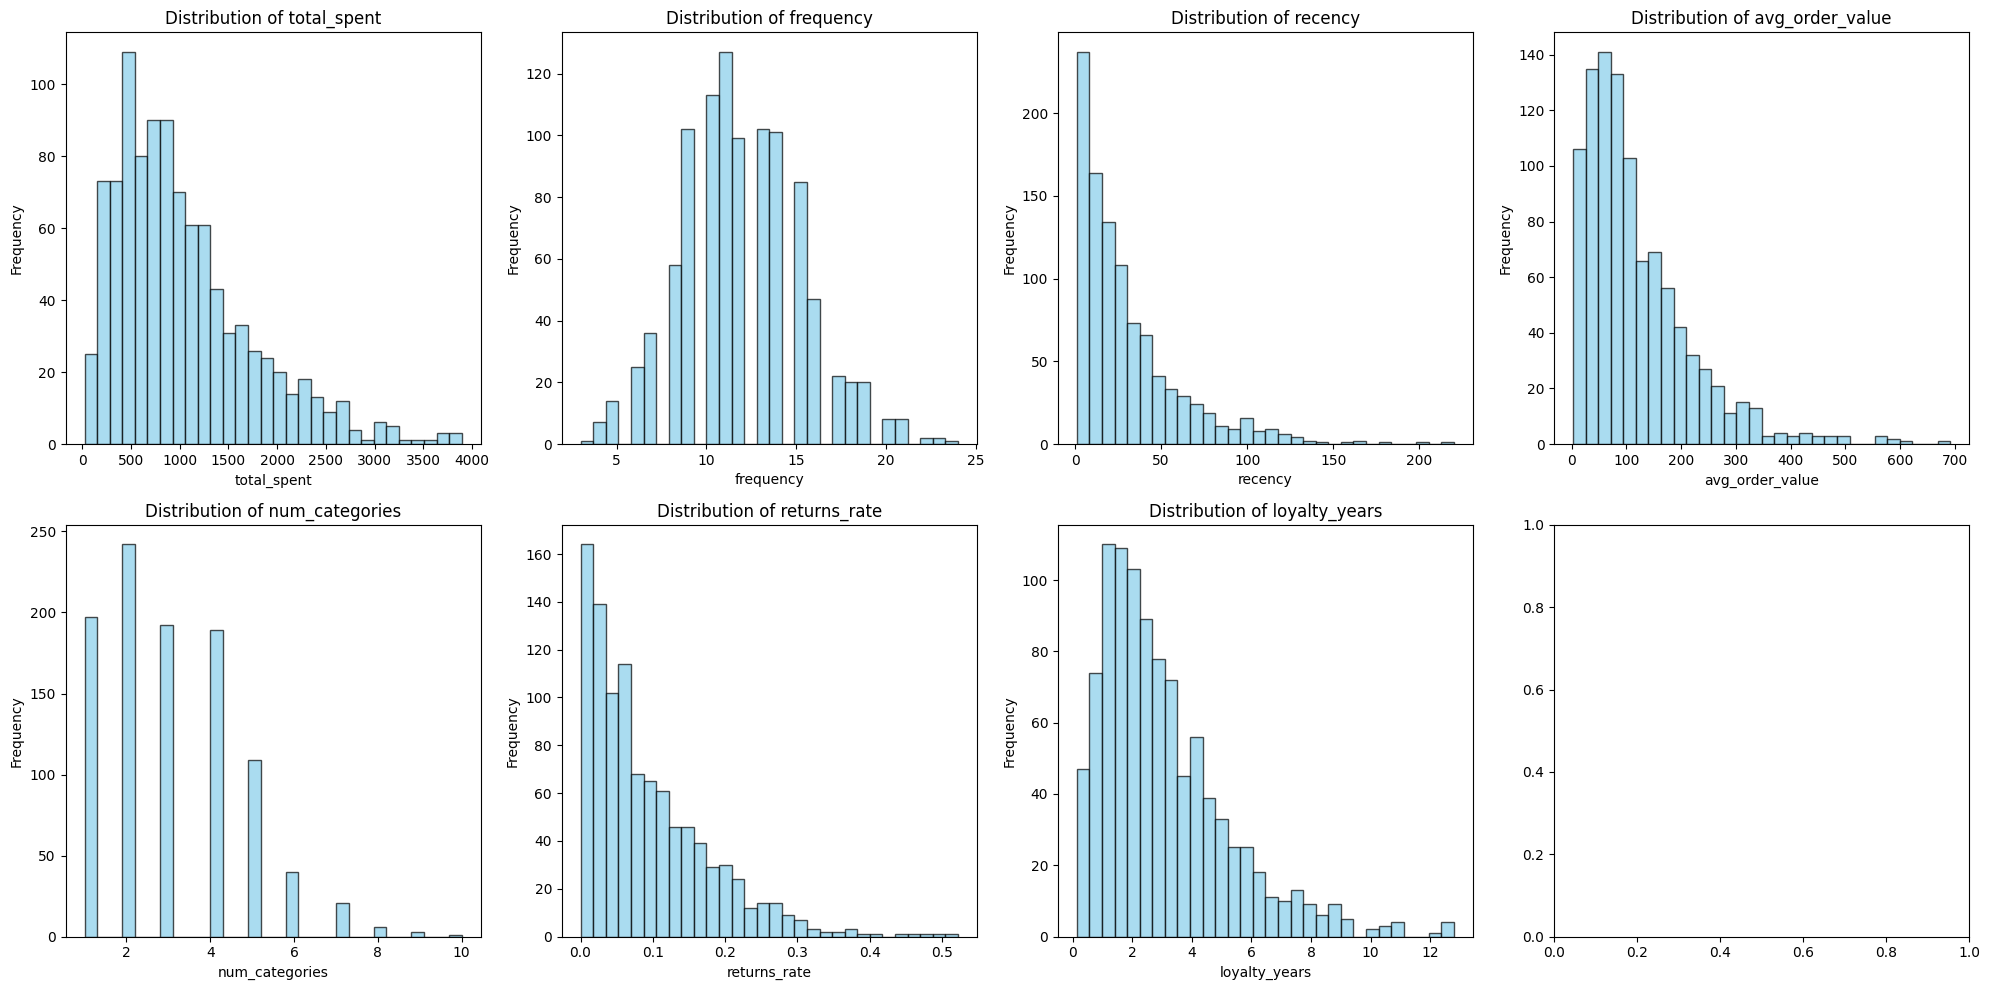

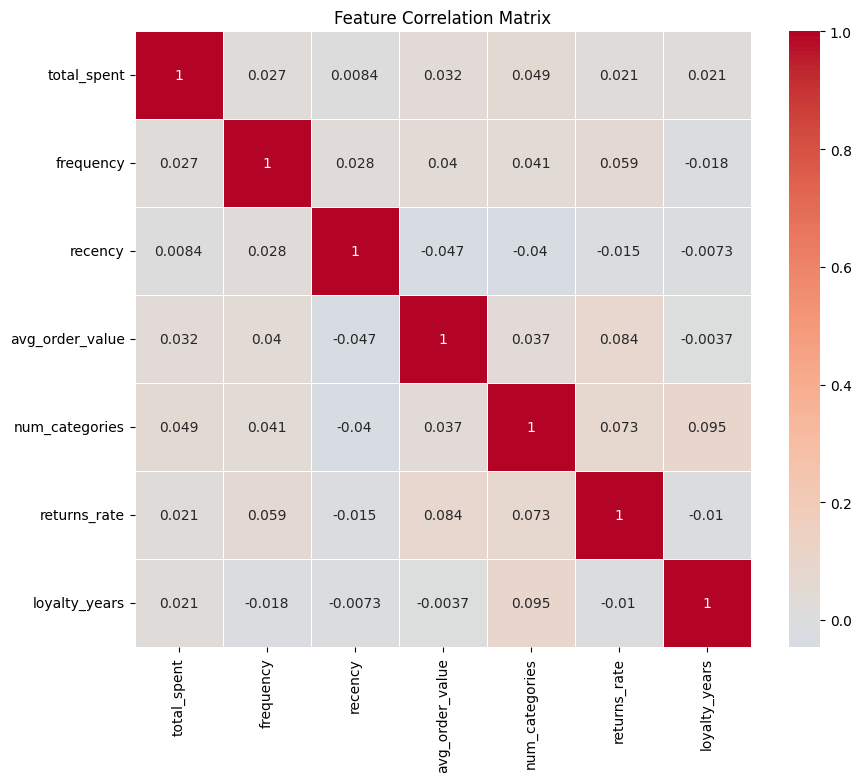


Step 3: Data Preprocessing

=== DATA PREPROCESSING ===
Features selected for clustering: ['total_spent', 'frequency', 'recency', 'avg_order_value', 'num_categories', 'returns_rate', 'loyalty_years']
Features scaled using StandardScaler

Step 4: Finding Optimal Clusters

=== FINDING OPTIMAL NUMBER OF CLUSTERS ===


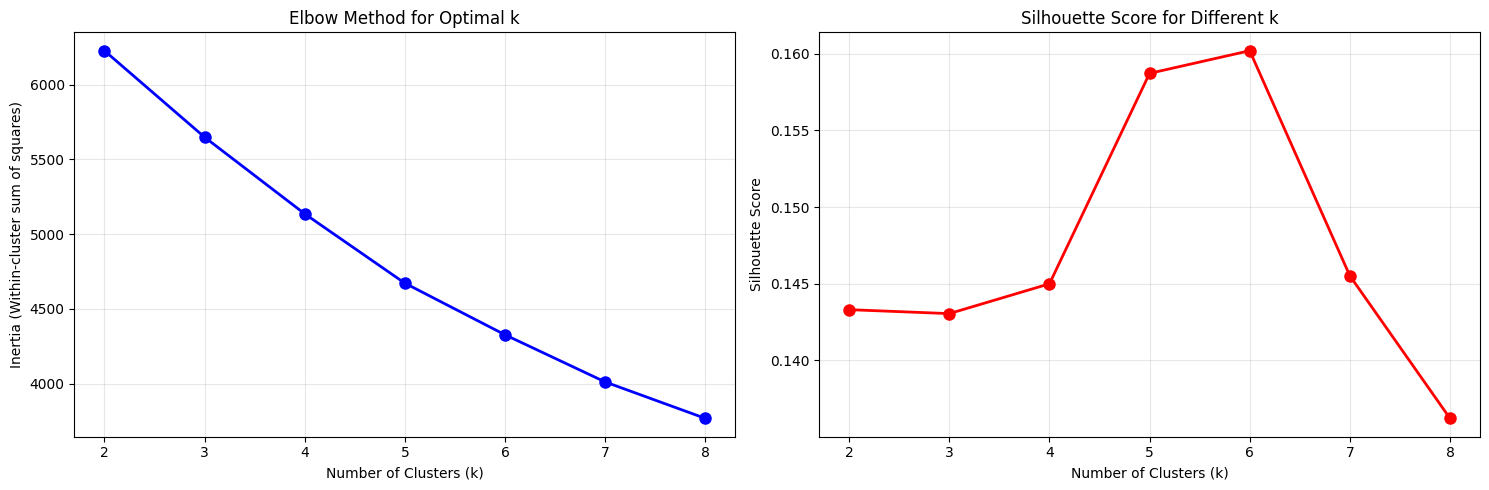

Optimal number of clusters based on silhouette score: 6
Silhouette score for k=6: 0.160

Step 5: Performing Clustering with k=6

=== PERFORMING K-MEANS CLUSTERING ===
Clustering completed with 6 clusters
Silhouette score: 0.160

Cluster distribution:
Cluster 0: 389 customers (38.9%)
Cluster 1: 154 customers (15.4%)
Cluster 2: 133 customers (13.3%)
Cluster 3: 123 customers (12.3%)
Cluster 4: 104 customers (10.4%)
Cluster 5: 97 customers (9.7%)

Step 6: Cluster Analysis

=== CLUSTER ANALYSIS ===
Cluster characteristics (mean ± std):
        total_spent         frequency       recency        avg_order_value  \
               mean     std      mean   std    mean    std            mean   
cluster                                                                      
0            727.75  396.03     11.26  3.21   19.22  15.46           86.16   
1            982.56  509.02     12.92  3.72   25.50  21.45          119.93   
2            923.31  567.85     11.71  3.05   24.18  19.37           90.1

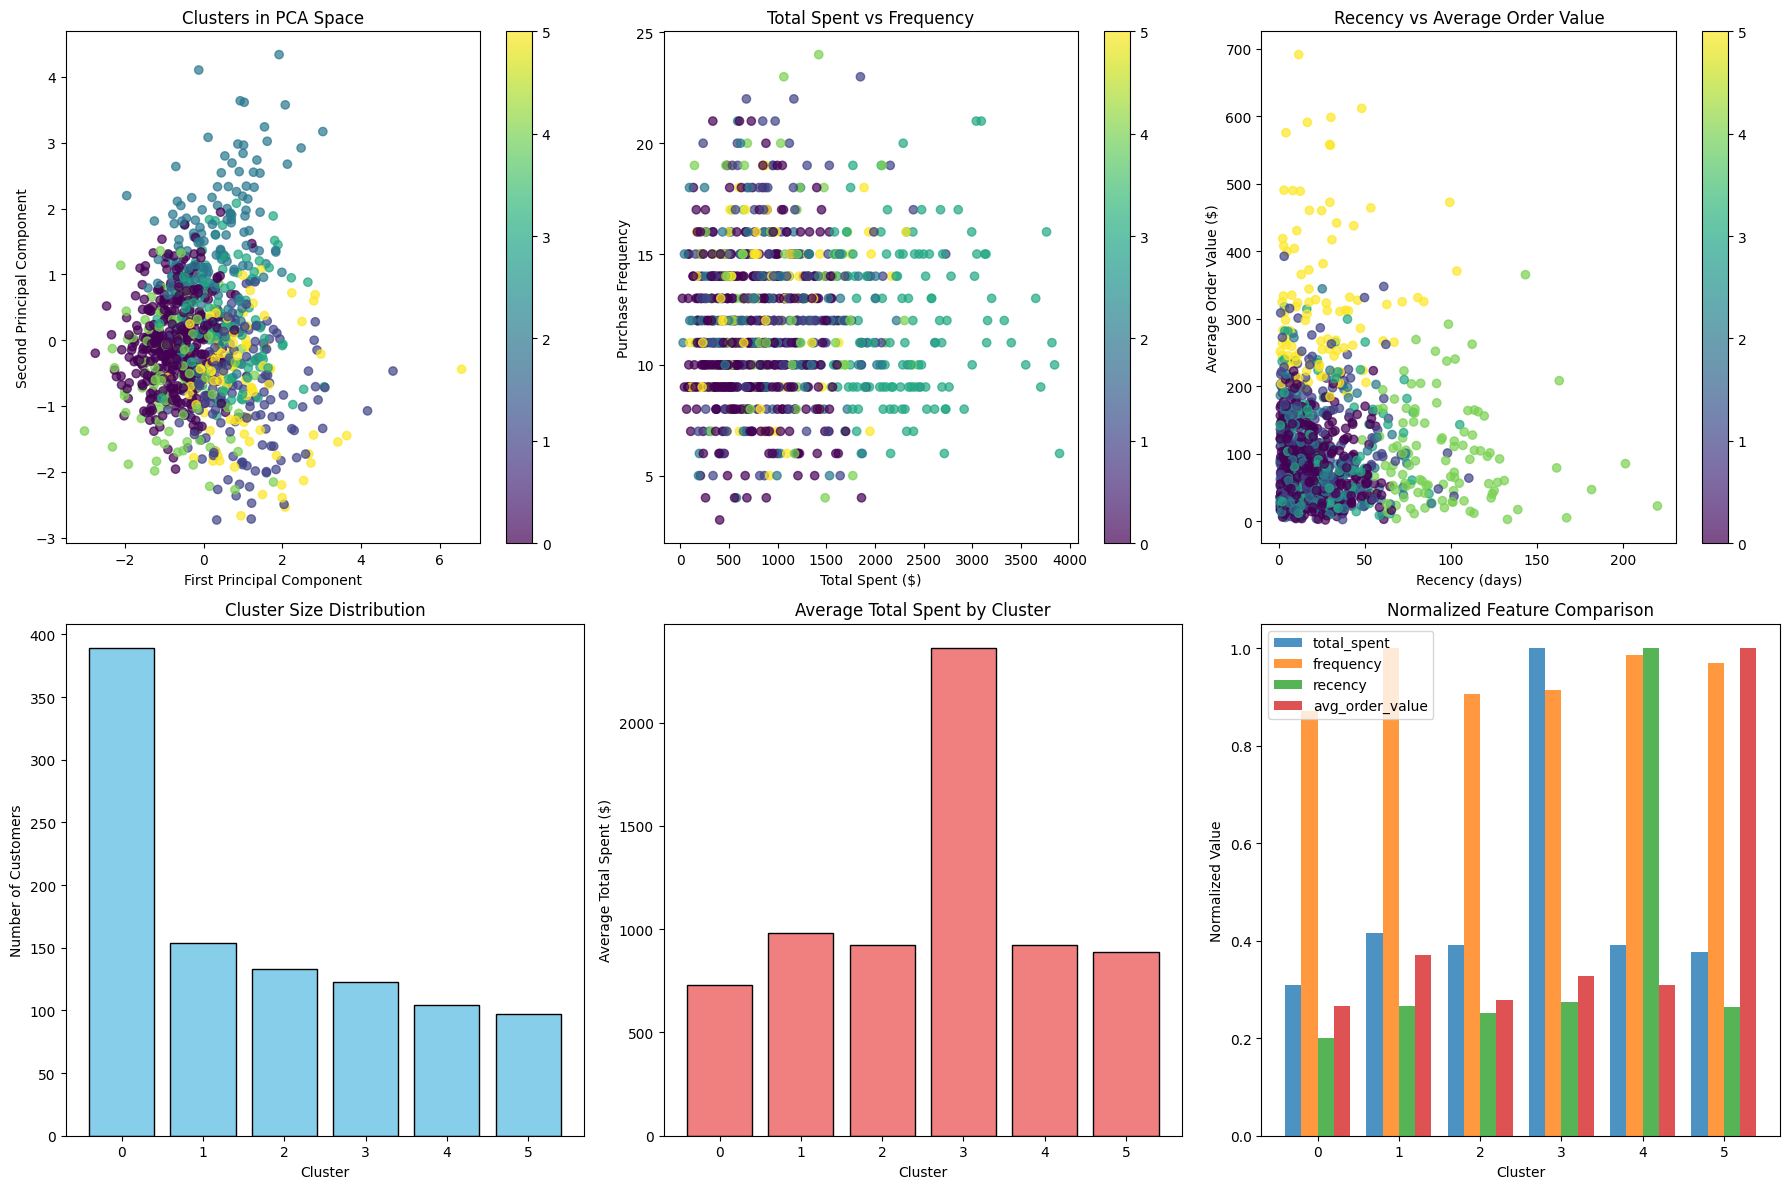


Step 8: Business Recommendations

=== MARKETING RECOMMENDATIONS ===

=== CLUSTER ANALYSIS ===
Cluster characteristics (mean ± std):
        total_spent         frequency       recency        avg_order_value  \
               mean     std      mean   std    mean    std            mean   
cluster                                                                      
0            727.75  396.03     11.26  3.21   19.22  15.46           86.16   
1            982.56  509.02     12.92  3.72   25.50  21.45          119.93   
2            923.31  567.85     11.71  3.05   24.18  19.37           90.17   
3           2360.54  559.20     11.82  3.43   26.24  21.85          105.75   
4            924.04  520.58     12.75  3.50   95.96  30.79          100.09   
5            889.81  501.71     12.53  3.19   25.38  21.67          323.78   

                num_categories       returns_rate       loyalty_years        
            std           mean   std         mean   std          mean   std  
cluster 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

class CustomerSegmentation:
    def __init__(self):
        self.scaler = StandardScaler()
        self.kmeans = None
        self.pca = PCA(n_components=2)
        self.data = None
        self.scaled_data = None
        self.clusters = None

    def generate_sample_data(self, n_customers=1000):
        """Generate sample customer purchase data"""
        print("Generating sample customer data...")

        # Generate customer IDs
        customer_ids = [f"CUST_{i:04d}" for i in range(1, n_customers + 1)]

        # Generate purchase features
        data = {
            'customer_id': customer_ids,
            'total_spent': np.random.gamma(2, 500, n_customers),  # Total amount spent
            'frequency': np.random.poisson(12, n_customers),       # Purchase frequency
            'recency': np.random.exponential(30, n_customers),     # Days since last purchase
            'avg_order_value': np.random.gamma(1.5, 80, n_customers),  # Average order value
            'num_categories': np.random.poisson(3, n_customers),   # Number of product categories purchased
            'returns_rate': np.random.beta(1, 10, n_customers),   # Return rate (0-1)
            'loyalty_years': np.random.gamma(2, 1.5, n_customers) # Years as customer
        }

        self.data = pd.DataFrame(data)

        # Ensure realistic constraints
        self.data['frequency'] = np.maximum(1, self.data['frequency'])
        self.data['recency'] = np.maximum(1, self.data['recency'])
        self.data['num_categories'] = np.maximum(1, self.data['num_categories'])
        self.data['loyalty_years'] = np.maximum(0.1, self.data['loyalty_years'])

        print(f"Generated data for {n_customers} customers")
        return self.data

    def load_data(self, filepath):
        """Load customer data from CSV file"""
        try:
            self.data = pd.read_csv(filepath)
            print(f"Loaded data with {len(self.data)} customers")
            return self.data
        except FileNotFoundError:
            print(f"File {filepath} not found. Generating sample data instead.")
            return self.generate_sample_data()

    def explore_data(self):
        """Explore and visualize the customer data"""
        print("\n=== DATA EXPLORATION ===")
        print(f"Dataset shape: {self.data.shape}")
        print(f"\nFirst 5 rows:")
        print(self.data.head())

        print(f"\nData types:")
        print(self.data.dtypes)

        print(f"\nSummary statistics:")
        print(self.data.describe())

        # Check for missing values
        print(f"\nMissing values:")
        print(self.data.isnull().sum())

        # Create visualizations
        fig, axes = plt.subplots(2, 4, figsize=(20, 10))
        axes = axes.ravel()

        numeric_cols = self.data.select_dtypes(include=[np.number]).columns
        numeric_cols = [col for col in numeric_cols if col != 'customer_id']

        for i, col in enumerate(numeric_cols):
            if i < len(axes):
                axes[i].hist(self.data[col], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
                axes[i].set_title(f'Distribution of {col}')
                axes[i].set_xlabel(col)
                axes[i].set_ylabel('Frequency')

        plt.tight_layout()
        plt.show()

        # Correlation matrix
        plt.figure(figsize=(10, 8))
        correlation_matrix = self.data[numeric_cols].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                   square=True, linewidths=0.5)
        plt.title('Feature Correlation Matrix')
        plt.show()

    def preprocess_data(self):
        """Preprocess data for clustering"""
        print("\n=== DATA PREPROCESSING ===")

        # Select features for clustering (exclude customer_id)
        feature_cols = [col for col in self.data.columns if col != 'customer_id']
        features = self.data[feature_cols]

        print(f"Features selected for clustering: {feature_cols}")

        # Handle missing values if any
        if features.isnull().sum().sum() > 0:
            features = features.fillna(features.mean())
            print("Missing values filled with mean values")

        # Scale the features
        self.scaled_data = self.scaler.fit_transform(features)
        print("Features scaled using StandardScaler")

        return self.scaled_data

    def find_optimal_clusters(self, max_k=10):
        """Find optimal number of clusters using elbow method and silhouette score"""
        print("\n=== FINDING OPTIMAL NUMBER OF CLUSTERS ===")

        if self.scaled_data is None:
            self.preprocess_data()

        # Calculate metrics for different k values
        k_values = range(2, max_k + 1)
        inertias = []
        silhouette_scores = []

        for k in k_values:
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
            kmeans.fit(self.scaled_data)
            inertias.append(kmeans.inertia_)
            silhouette_scores.append(silhouette_score(self.scaled_data, kmeans.labels_))

        # Plot elbow curve and silhouette scores
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

        # Elbow method
        ax1.plot(k_values, inertias, 'bo-', linewidth=2, markersize=8)
        ax1.set_xlabel('Number of Clusters (k)')
        ax1.set_ylabel('Inertia (Within-cluster sum of squares)')
        ax1.set_title('Elbow Method for Optimal k')
        ax1.grid(True, alpha=0.3)

        # Silhouette scores
        ax2.plot(k_values, silhouette_scores, 'ro-', linewidth=2, markersize=8)
        ax2.set_xlabel('Number of Clusters (k)')
        ax2.set_ylabel('Silhouette Score')
        ax2.set_title('Silhouette Score for Different k')
        ax2.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Find optimal k (highest silhouette score)
        optimal_k = k_values[np.argmax(silhouette_scores)]
        print(f"Optimal number of clusters based on silhouette score: {optimal_k}")
        print(f"Silhouette score for k={optimal_k}: {max(silhouette_scores):.3f}")

        return optimal_k, silhouette_scores

    def perform_clustering(self, n_clusters=None):
        """Perform K-means clustering"""
        print("\n=== PERFORMING K-MEANS CLUSTERING ===")

        if self.scaled_data is None:
            self.preprocess_data()

        if n_clusters is None:
            n_clusters, _ = self.find_optimal_clusters()

        # Perform clustering
        self.kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        self.clusters = self.kmeans.fit_predict(self.scaled_data)

        # Add cluster labels to original data
        self.data['cluster'] = self.clusters

        print(f"Clustering completed with {n_clusters} clusters")
        print(f"Silhouette score: {silhouette_score(self.scaled_data, self.clusters):.3f}")

        # Display cluster distribution
        cluster_counts = pd.Series(self.clusters).value_counts().sort_index()
        print(f"\nCluster distribution:")
        for cluster, count in cluster_counts.items():
            percentage = (count / len(self.clusters)) * 100
            print(f"Cluster {cluster}: {count} customers ({percentage:.1f}%)")

        return self.clusters

    def analyze_clusters(self):
        """Analyze and interpret the clusters"""
        print("\n=== CLUSTER ANALYSIS ===")

        if self.clusters is None:
            print("Please perform clustering first!")
            return

        # Calculate cluster centers in original scale
        feature_cols = [col for col in self.data.columns if col not in ['customer_id', 'cluster']]

        cluster_summary = self.data.groupby('cluster')[feature_cols].agg(['mean', 'std']).round(2)
        print("Cluster characteristics (mean ± std):")
        print(cluster_summary)

        # Create cluster profiles
        cluster_profiles = {}
        for cluster_id in sorted(self.data['cluster'].unique()):
            cluster_data = self.data[self.data['cluster'] == cluster_id]

            profile = {
                'size': len(cluster_data),
                'avg_total_spent': cluster_data['total_spent'].mean(),
                'avg_frequency': cluster_data['frequency'].mean(),
                'avg_recency': cluster_data['recency'].mean(),
                'avg_order_value': cluster_data['avg_order_value'].mean(),
                'avg_loyalty_years': cluster_data['loyalty_years'].mean()
            }
            cluster_profiles[cluster_id] = profile

        # Print cluster interpretations
        print(f"\n=== CLUSTER INTERPRETATIONS ===")
        cluster_names = {}

        for cluster_id, profile in cluster_profiles.items():
            print(f"\nCluster {cluster_id} ({profile['size']} customers):")
            print(f"  - Average total spent: ${profile['avg_total_spent']:.2f}")
            print(f"  - Average purchase frequency: {profile['avg_frequency']:.1f} times")
            print(f"  - Average recency: {profile['avg_recency']:.1f} days")
            print(f"  - Average order value: ${profile['avg_order_value']:.2f}")
            print(f"  - Average loyalty: {profile['avg_loyalty_years']:.1f} years")

            # Suggest cluster names based on characteristics
            if profile['avg_total_spent'] > 1000 and profile['avg_frequency'] > 15:
                cluster_names[cluster_id] = "High-Value Frequent Buyers"
            elif profile['avg_total_spent'] > 800 and profile['avg_recency'] < 20:
                cluster_names[cluster_id] = "Premium Recent Customers"
            elif profile['avg_frequency'] < 8 and profile['avg_recency'] > 40:
                cluster_names[cluster_id] = "At-Risk Customers"
            elif profile['avg_loyalty_years'] > 2 and profile['avg_frequency'] > 10:
                cluster_names[cluster_id] = "Loyal Regular Customers"
            else:
                cluster_names[cluster_id] = f"Cluster {cluster_id}"

            print(f"  → Suggested name: {cluster_names[cluster_id]}")

        return cluster_profiles, cluster_names

    def visualize_clusters(self):
        """Visualize clusters using various plots"""
        print("\n=== CLUSTER VISUALIZATION ===")

        if self.clusters is None:
            print("Please perform clustering first!")
            return

        # PCA for 2D visualization
        pca_data = self.pca.fit_transform(self.scaled_data)

        # Create subplots
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))

        # 1. PCA scatter plot
        scatter = axes[0, 0].scatter(pca_data[:, 0], pca_data[:, 1],
                                   c=self.clusters, cmap='viridis', alpha=0.7)
        axes[0, 0].set_xlabel('First Principal Component')
        axes[0, 0].set_ylabel('Second Principal Component')
        axes[0, 0].set_title('Clusters in PCA Space')
        plt.colorbar(scatter, ax=axes[0, 0])

        # 2. Total Spent vs Frequency
        scatter = axes[0, 1].scatter(self.data['total_spent'], self.data['frequency'],
                                   c=self.clusters, cmap='viridis', alpha=0.7)
        axes[0, 1].set_xlabel('Total Spent ($)')
        axes[0, 1].set_ylabel('Purchase Frequency')
        axes[0, 1].set_title('Total Spent vs Frequency')
        plt.colorbar(scatter, ax=axes[0, 1])

        # 3. Recency vs Average Order Value
        scatter = axes[0, 2].scatter(self.data['recency'], self.data['avg_order_value'],
                                   c=self.clusters, cmap='viridis', alpha=0.7)
        axes[0, 2].set_xlabel('Recency (days)')
        axes[0, 2].set_ylabel('Average Order Value ($)')
        axes[0, 2].set_title('Recency vs Average Order Value')
        plt.colorbar(scatter, ax=axes[0, 2])

        # 4. Cluster size distribution
        cluster_counts = pd.Series(self.clusters).value_counts().sort_index()
        axes[1, 0].bar(cluster_counts.index, cluster_counts.values,
                      color='skyblue', edgecolor='black')
        axes[1, 0].set_xlabel('Cluster')
        axes[1, 0].set_ylabel('Number of Customers')
        axes[1, 0].set_title('Cluster Size Distribution')

        # 5. Average total spent by cluster
        avg_spent = self.data.groupby('cluster')['total_spent'].mean()
        axes[1, 1].bar(avg_spent.index, avg_spent.values,
                      color='lightcoral', edgecolor='black')
        axes[1, 1].set_xlabel('Cluster')
        axes[1, 1].set_ylabel('Average Total Spent ($)')
        axes[1, 1].set_title('Average Total Spent by Cluster')

        # 6. Feature comparison across clusters
        feature_cols = ['total_spent', 'frequency', 'recency', 'avg_order_value']
        cluster_means = self.data.groupby('cluster')[feature_cols].mean()

        # Normalize for comparison
        cluster_means_norm = cluster_means.div(cluster_means.max())

        x = np.arange(len(cluster_means.index))
        width = 0.2

        for i, feature in enumerate(feature_cols):
            axes[1, 2].bar(x + i*width, cluster_means_norm[feature],
                          width, label=feature, alpha=0.8)

        axes[1, 2].set_xlabel('Cluster')
        axes[1, 2].set_ylabel('Normalized Value')
        axes[1, 2].set_title('Normalized Feature Comparison')
        axes[1, 2].set_xticks(x + width * 1.5)
        axes[1, 2].set_xticklabels(cluster_means.index)
        axes[1, 2].legend()

        plt.tight_layout()
        plt.show()

    def get_cluster_recommendations(self):
        """Generate business recommendations for each cluster"""
        print("\n=== MARKETING RECOMMENDATIONS ===")

        cluster_profiles, cluster_names = self.analyze_clusters()

        recommendations = {}

        for cluster_id, profile in cluster_profiles.items():
            cluster_name = cluster_names[cluster_id]

            if "High-Value Frequent" in cluster_name:
                rec = [
                    "Offer VIP membership programs",
                    "Provide exclusive early access to new products",
                    "Implement premium customer service",
                    "Create loyalty rewards program with high-value benefits"
                ]
            elif "Premium Recent" in cluster_name:
                rec = [
                    "Send personalized product recommendations",
                    "Offer bundle deals to increase order value",
                    "Provide premium shipping options",
                    "Create targeted upselling campaigns"
                ]
            elif "At-Risk" in cluster_name:
                rec = [
                    "Launch re-engagement email campaigns",
                    "Offer comeback discounts and incentives",
                    "Conduct customer feedback surveys",
                    "Implement win-back strategies"
                ]
            elif "Loyal Regular" in cluster_name:
                rec = [
                    "Maintain consistent communication",
                    "Offer referral bonuses",
                    "Provide seasonal promotions",
                    "Create community engagement programs"
                ]
            else:
                rec = [
                    "Analyze customer behavior patterns",
                    "Test different marketing approaches",
                    "Gather more customer data",
                    "Monitor for movement to other clusters"
                ]

            recommendations[cluster_id] = {
                'name': cluster_name,
                'recommendations': rec
            }

            print(f"\n{cluster_name} (Cluster {cluster_id}):")
            for i, r in enumerate(rec, 1):
                print(f"  {i}. {r}")

        return recommendations

    def save_results(self, filename='customer_clusters.csv'):
        """Save clustered data to CSV"""
        if self.data is not None and 'cluster' in self.data.columns:
            self.data.to_csv(filename, index=False)
            print(f"\nResults saved to {filename}")
        else:
            print("No clustering results to save!")

# Main execution function
def main():
    """Main function to run the complete customer segmentation analysis"""
    print("=== CUSTOMER SEGMENTATION USING K-MEANS CLUSTERING ===\n")

    # Initialize the segmentation object
    segmentation = CustomerSegmentation()

    # Step 1: Load or generate data
    print("Step 1: Loading/Generating Data")
    data = segmentation.generate_sample_data(n_customers=1000)

    # Step 2: Explore the data
    print("\nStep 2: Data Exploration")
    segmentation.explore_data()

    # Step 3: Preprocess data
    print("\nStep 3: Data Preprocessing")
    segmentation.preprocess_data()

    # Step 4: Find optimal number of clusters
    print("\nStep 4: Finding Optimal Clusters")
    optimal_k, scores = segmentation.find_optimal_clusters(max_k=8)

    # Step 5: Perform clustering
    print(f"\nStep 5: Performing Clustering with k={optimal_k}")
    clusters = segmentation.perform_clustering(n_clusters=optimal_k)

    # Step 6: Analyze clusters
    print("\nStep 6: Cluster Analysis")
    cluster_profiles, cluster_names = segmentation.analyze_clusters()

    # Step 7: Visualize results
    print("\nStep 7: Visualization")
    segmentation.visualize_clusters()

    # Step 8: Generate recommendations
    print("\nStep 8: Business Recommendations")
    recommendations = segmentation.get_cluster_recommendations()

    # Step 9: Save results
    print("\nStep 9: Saving Results")
    segmentation.save_results('customer_segments.csv')

    print("\n=== ANALYSIS COMPLETE ===")
    print("Check the generated plots and saved CSV file for detailed results!")

    return segmentation

if __name__ == "__main__":
    # Run the complete analysis
    customer_segmentation = main()

✅ All libraries imported successfully!
✅ Dataset generation function ready!
✅ Analysis functions ready!
✅ Visualization and recommendation functions ready!
🛍️  RETAIL CUSTOMER SEGMENTATION ANALYSIS

1. Generating synthetic customer dataset...
Dataset created with 1000 customers

Dataset Overview:


,annual_spending,frequency_score,avg_order_value,days_since_last_purchase,total_orders,return_rate,customer_id
0,1367.072301,32.977894,69.113675,53.927479,14,0.168954,CUST_0968
1,2700.558214,50.269710,111.963484,25.320916,29,0.071079,CUST_0667
2,3077.106655,64.525205,100.884483,31.022513,24,0.096129,CUST_0447
3,8452.321014,85.210038,202.661737,23.826415,47,0.057299,CUST_0116
4,2828.632266,62.870962,94.130461,29.229742,27,0.031653,CUST_0424



Dataset Statistics:


,annual_spending,frequency_score,avg_order_value,days_since_last_purchase,total_orders,return_rate
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3712.674893,57.497071,96.956832,35.545305,25.012000,0.083992
std,2510.339767,20.404981,50.174500,21.625993,13.238244,0.039965
min,100.000000,10.000000,20.000000,1.000000,1.000000,0.000000
25%,1538.644918,40.345580,57.619137,19.948881,14.000000,0.056559
50%,3337.098356,57.495968,90.387329,31.397737,24.000000,0.079431
75%,4571.891769,72.752340,118.829814,48.256980,32.000000,0.108769
max,12080.253750,100.000000,272.366424,118.713158,65.000000,0.243932



2. Determining optimal number of clusters...

Elbow Method Analysis:


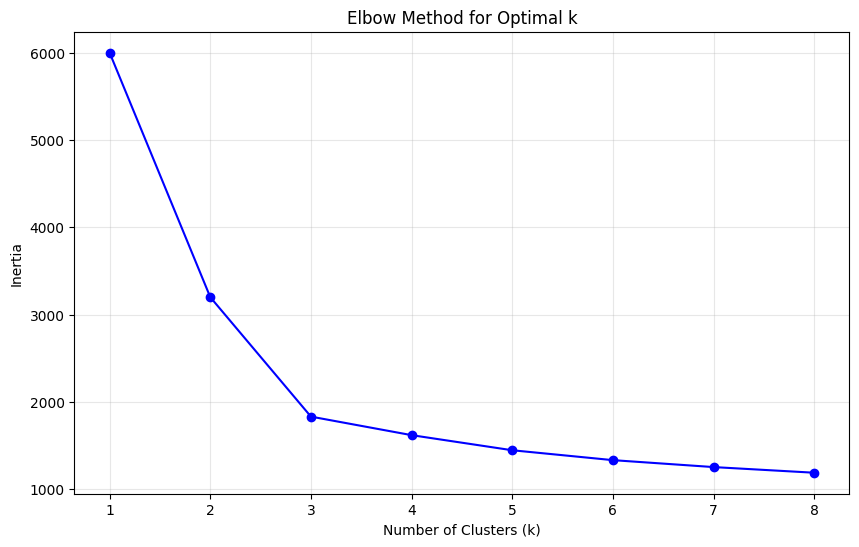


Silhouette Analysis:


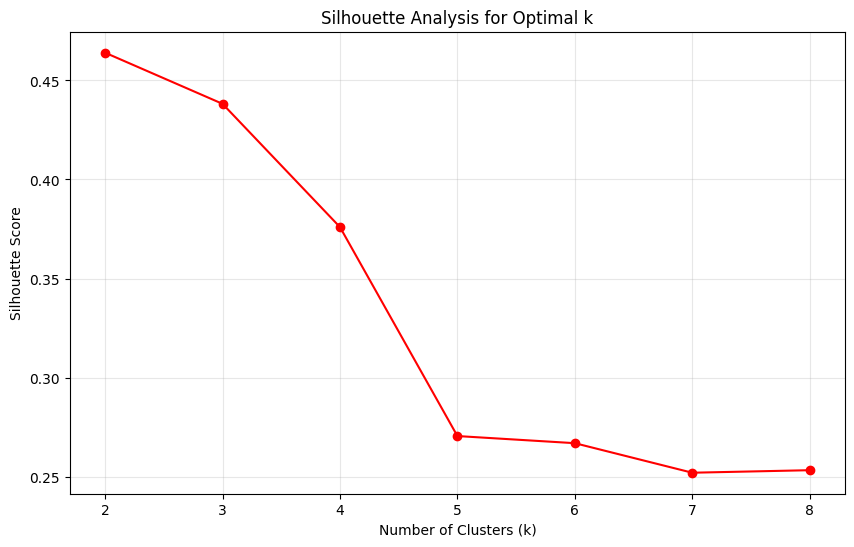


Optimal number of clusters based on silhouette score: 2
Best silhouette score: 0.464

3. Performing K-means clustering with k=2...

4. Analyzing cluster characteristics...
=== CLUSTER ANALYSIS ===

Cluster Sizes:
  Cluster 0: 204 customers (20.4%)
  Cluster 1: 796 customers (79.6%)


CLUSTER 0 CHARACTERISTICS:
Size: 204 customers
------------------------------
annual_spending: 7871.56
frequency_score: 85.24
avg_order_value: 175.99
days_since_last_purchase: 15.23
total_orders: 45.23
return_rate: 0.05

Interpretation: HIGH-VALUE CUSTOMERS

CLUSTER 1 CHARACTERISTICS:
Size: 796 customers
------------------------------
annual_spending: 2646.83
frequency_score: 50.39
avg_order_value: 76.70
days_since_last_purchase: 40.75
total_orders: 19.83
return_rate: 0.09

Interpretation: MEDIUM-VALUE CUSTOMERS

5. Creating visualizations...


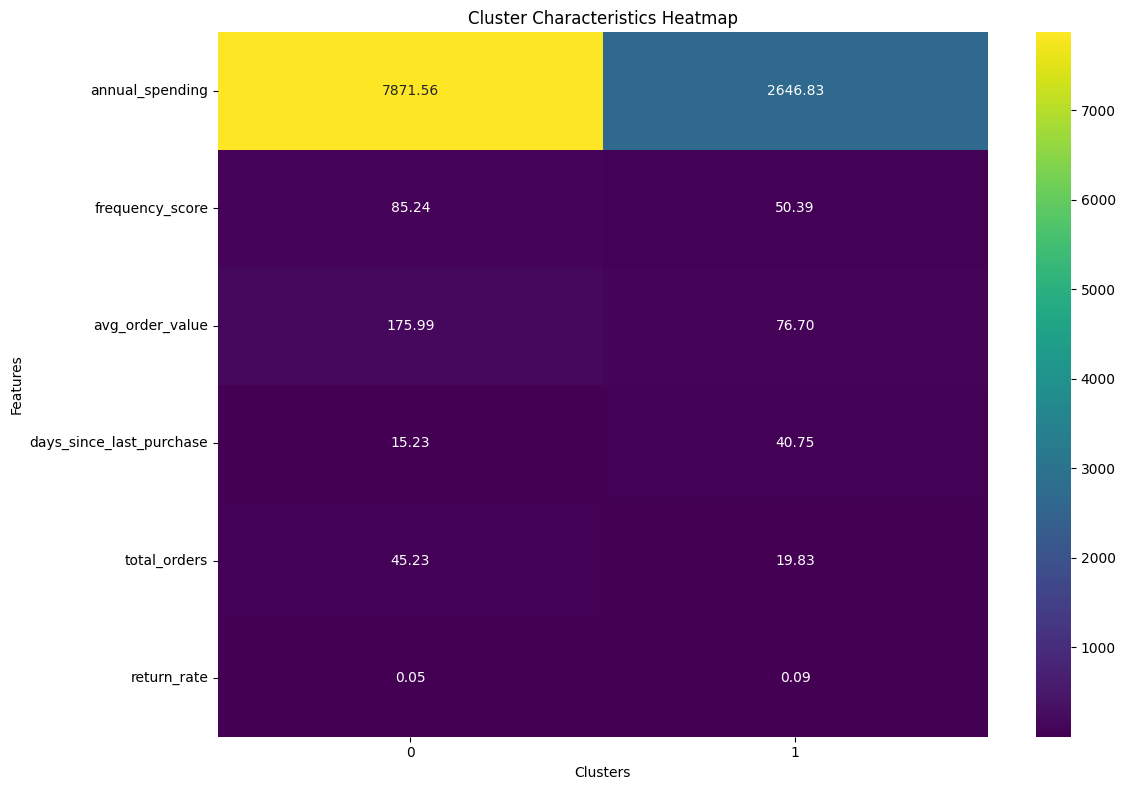

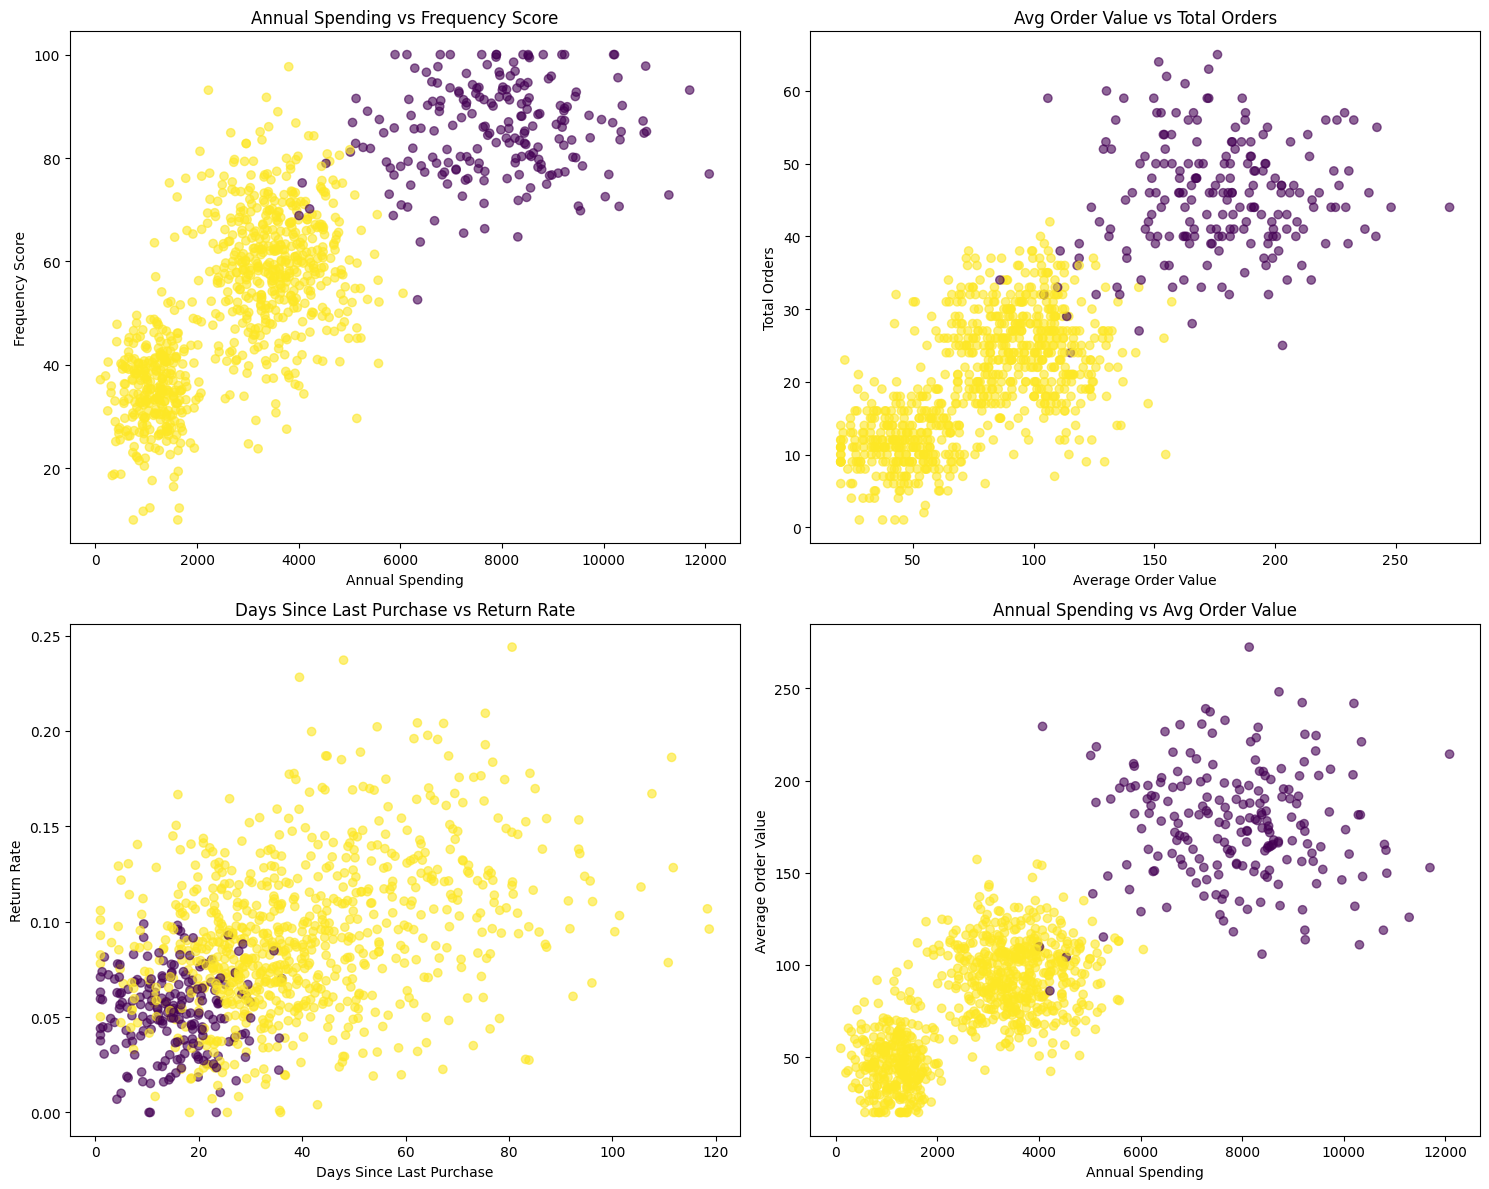

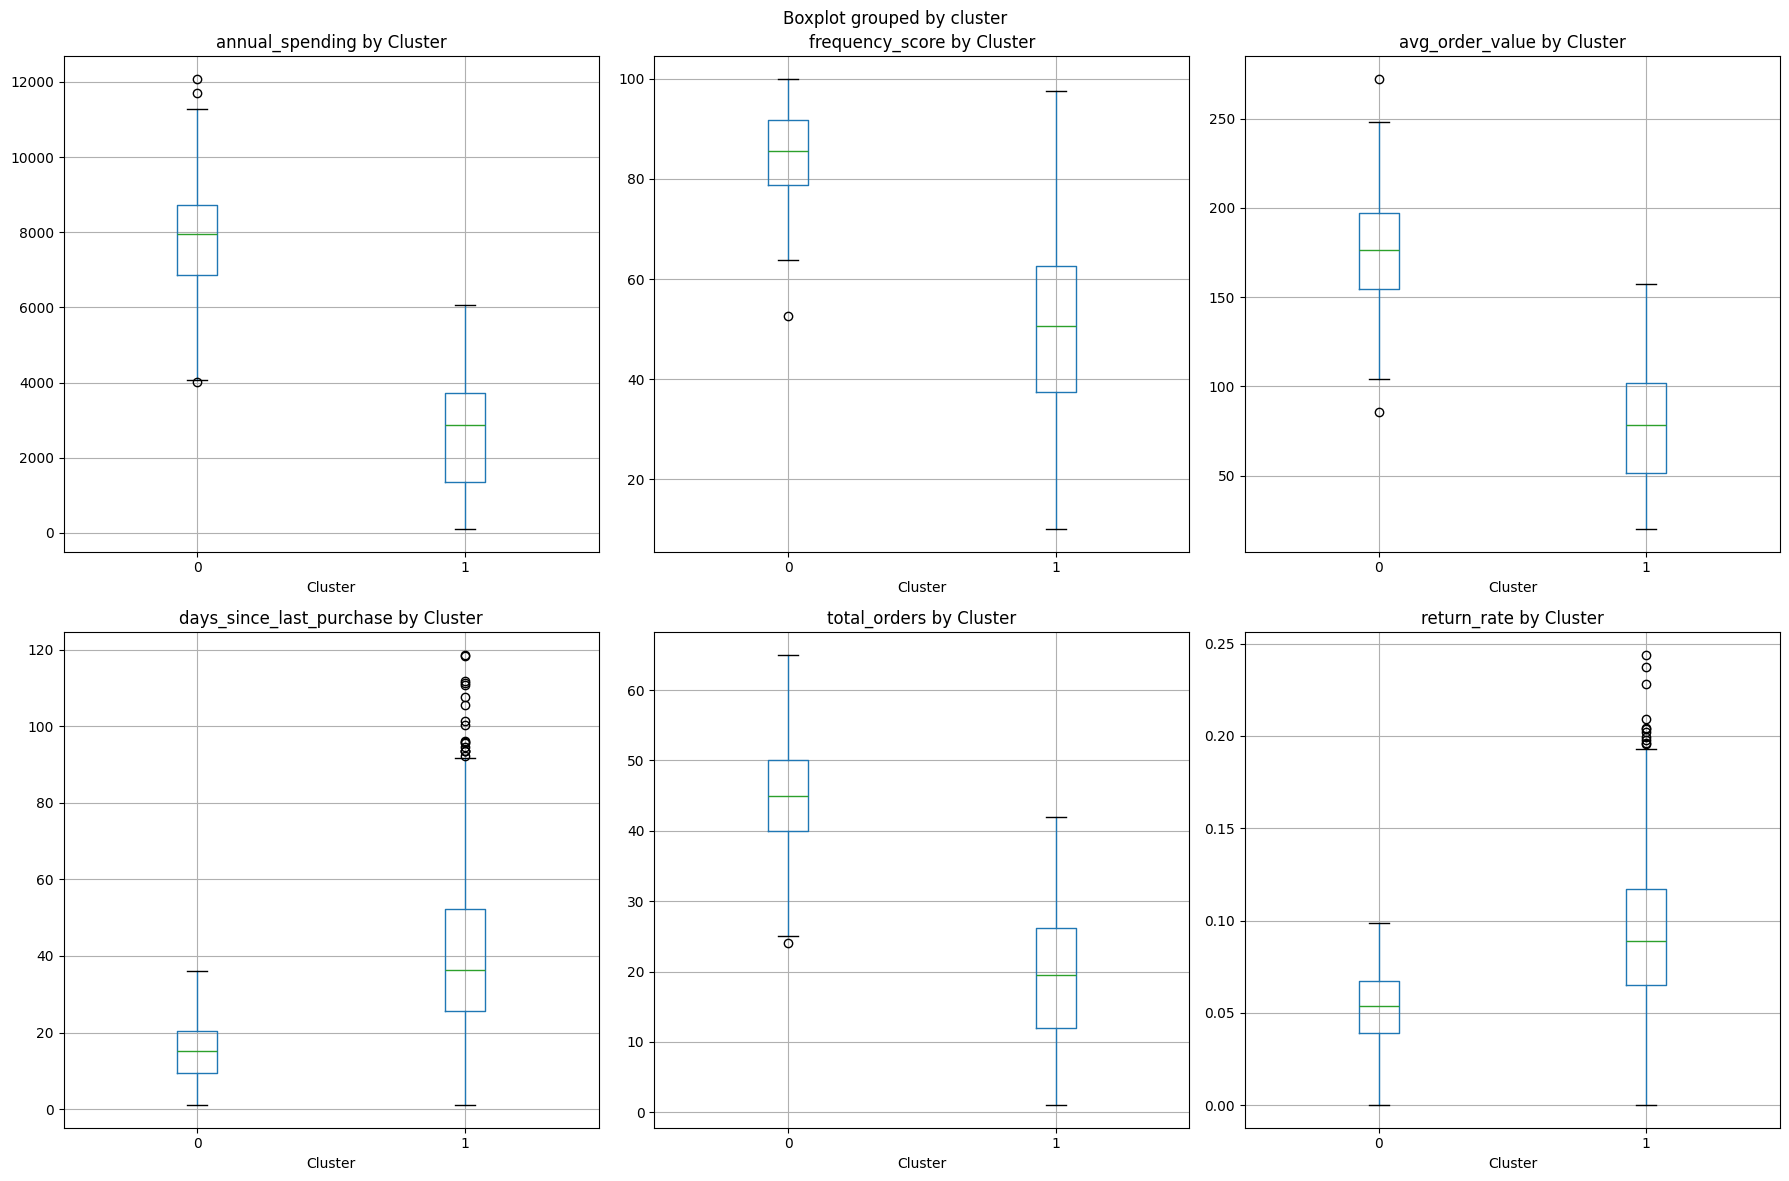


BUSINESS RECOMMENDATIONS

CLUSTER 0 STRATEGY:
-------------------------
🏆 VIP CUSTOMER SEGMENT
• Implement premium loyalty program
• Offer exclusive early access to new products
• Provide dedicated customer service
• Send personalized product recommendations

CLUSTER 1 STRATEGY:
-------------------------
📈 GROWTH POTENTIAL SEGMENT
• Target with upselling campaigns
• Offer bundle deals to increase order value
• Implement referral programs
• Send regular promotional emails


6. Saving results...
Results saved to 'customer_segments.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


CLUSTERING MODEL PERFORMANCE
Silhouette Score: 0.464
Inertia: 3199.46
Number of iterations: 5

Cluster Centers (standardized):


,annual_spending,frequency_score,avg_order_value,days_since_last_purchase,total_orders,return_rate
0,1.658,1.360,1.576,-0.940,1.528,-0.793
1,-0.425,-0.349,-0.404,0.241,-0.392,0.203


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully!")

# Set random seed for reproducibility
np.random.seed(42)

def generate_customer_dataset(n_customers=1000):
    """
    Generate a synthetic retail customer dataset with purchase history features
    """

    # Customer demographics
    customer_ids = [f"CUST_{i:04d}" for i in range(1, n_customers + 1)]

    # Generate features based on different customer segments
    # Segment 1: High-value customers (20%)
    n_high_value = int(0.2 * n_customers)
    high_value_data = {
        'annual_spending': np.random.normal(8000, 1500, n_high_value),
        'frequency_score': np.random.normal(85, 10, n_high_value),
        'avg_order_value': np.random.normal(180, 30, n_high_value),
        'days_since_last_purchase': np.random.normal(15, 8, n_high_value),
        'total_orders': np.random.normal(45, 8, n_high_value),
        'return_rate': np.random.normal(0.05, 0.02, n_high_value)
    }

    # Segment 2: Medium-value customers (50%)
    n_medium_value = int(0.5 * n_customers)
    medium_value_data = {
        'annual_spending': np.random.normal(3500, 800, n_medium_value),
        'frequency_score': np.random.normal(60, 12, n_medium_value),
        'avg_order_value': np.random.normal(95, 20, n_medium_value),
        'days_since_last_purchase': np.random.normal(30, 12, n_medium_value),
        'total_orders': np.random.normal(25, 6, n_medium_value),
        'return_rate': np.random.normal(0.08, 0.03, n_medium_value)
    }

    # Segment 3: Low-value customers (30%)
    n_low_value = n_customers - n_high_value - n_medium_value
    low_value_data = {
        'annual_spending': np.random.normal(1200, 400, n_low_value),
        'frequency_score': np.random.normal(35, 8, n_low_value),
        'avg_order_value': np.random.normal(45, 15, n_low_value),
        'days_since_last_purchase': np.random.normal(60, 20, n_low_value),
        'total_orders': np.random.normal(12, 4, n_low_value),
        'return_rate': np.random.normal(0.12, 0.04, n_low_value)
    }

    # Combine all segments
    all_data = {}
    for feature in high_value_data.keys():
        all_data[feature] = np.concatenate([
            high_value_data[feature],
            medium_value_data[feature],
            low_value_data[feature]
        ])

    # Create DataFrame
    df = pd.DataFrame(all_data)
    df['customer_id'] = customer_ids

    # Ensure realistic constraints
    df['annual_spending'] = np.clip(df['annual_spending'], 100, 15000)
    df['frequency_score'] = np.clip(df['frequency_score'], 10, 100)
    df['avg_order_value'] = np.clip(df['avg_order_value'], 20, 300)
    df['days_since_last_purchase'] = np.clip(df['days_since_last_purchase'], 1, 120)
    df['total_orders'] = np.clip(df['total_orders'], 1, 80).astype(int)
    df['return_rate'] = np.clip(df['return_rate'], 0, 0.3)

    # Shuffle the dataset
    df = df.sample(frac=1).reset_index(drop=True)

    return df

print("✅ Dataset generation function ready!")


def plot_elbow_method(data, max_k=10):
    """
    Plot the elbow method to determine optimal number of clusters
    """
    inertias = []
    k_range = range(1, max_k + 1)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(k_range, inertias, 'bo-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.grid(True, alpha=0.3)
    plt.show()

    return inertias

def calculate_silhouette_scores(data, max_k=10):
    """
    Calculate silhouette scores for different numbers of clusters
    """
    silhouette_scores = []
    k_range = range(2, max_k + 1)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    plt.figure(figsize=(10, 6))
    plt.plot(k_range, silhouette_scores, 'ro-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Analysis for Optimal k')
    plt.grid(True, alpha=0.3)
    plt.show()

    return dict(zip(k_range, silhouette_scores))

def perform_kmeans_clustering(data, n_clusters=3):
    """
    Perform K-means clustering on the data
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(data)

    return kmeans, cluster_labels

print("✅ Analysis functions ready!")

def analyze_clusters(df, cluster_labels, feature_cols):
    """
    Analyze and describe the characteristics of each cluster
    """
    df_analysis = df.copy()
    df_analysis['cluster'] = cluster_labels

    print("=== CLUSTER ANALYSIS ===\n")

    # Overall statistics
    cluster_sizes = df_analysis['cluster'].value_counts().sort_index()
    print("Cluster Sizes:")
    for cluster, size in cluster_sizes.items():
        percentage = (size / len(df_analysis)) * 100
        print(f"  Cluster {cluster}: {size} customers ({percentage:.1f}%)")

    print("\n" + "="*50)

    # Detailed cluster characteristics
    for cluster in sorted(df_analysis['cluster'].unique()):
        cluster_data = df_analysis[df_analysis['cluster'] == cluster]
        print(f"\nCLUSTER {cluster} CHARACTERISTICS:")
        print(f"Size: {len(cluster_data)} customers")
        print("-" * 30)

        for feature in feature_cols:
            mean_val = cluster_data[feature].mean()
            print(f"{feature}: {mean_val:.2f}")

        # Cluster interpretation
        if cluster_data['annual_spending'].mean() > 6000:
            cluster_type = "HIGH-VALUE CUSTOMERS"
        elif cluster_data['annual_spending'].mean() > 2500:
            cluster_type = "MEDIUM-VALUE CUSTOMERS"
        else:
            cluster_type = "LOW-VALUE CUSTOMERS"

        print(f"\nInterpretation: {cluster_type}")
        print("="*50)

    return df_analysis

def visualize_clusters(df_clustered, feature_cols):
    """
    Create visualizations for the clusters
    """
    # 1. Cluster comparison heatmap
    plt.figure(figsize=(12, 8))
    cluster_means = df_clustered.groupby('cluster')[feature_cols].mean()
    sns.heatmap(cluster_means.T, annot=True, cmap='viridis', fmt='.2f')
    plt.title('Cluster Characteristics Heatmap')
    plt.ylabel('Features')
    plt.xlabel('Clusters')
    plt.tight_layout()
    plt.show()

    # 2. Scatter plots for key features
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Annual spending vs Frequency score
    scatter1 = axes[0, 0].scatter(df_clustered['annual_spending'],
                                 df_clustered['frequency_score'],
                                 c=df_clustered['cluster'],
                                 cmap='viridis', alpha=0.6)
    axes[0, 0].set_xlabel('Annual Spending')
    axes[0, 0].set_ylabel('Frequency Score')
    axes[0, 0].set_title('Annual Spending vs Frequency Score')

    # Average order value vs Total orders
    scatter2 = axes[0, 1].scatter(df_clustered['avg_order_value'],
                                 df_clustered['total_orders'],
                                 c=df_clustered['cluster'],
                                 cmap='viridis', alpha=0.6)
    axes[0, 1].set_xlabel('Average Order Value')
    axes[0, 1].set_ylabel('Total Orders')
    axes[0, 1].set_title('Avg Order Value vs Total Orders')

    # Days since last purchase vs Return rate
    scatter3 = axes[1, 0].scatter(df_clustered['days_since_last_purchase'],
                                 df_clustered['return_rate'],
                                 c=df_clustered['cluster'],
                                 cmap='viridis', alpha=0.6)
    axes[1, 0].set_xlabel('Days Since Last Purchase')
    axes[1, 0].set_ylabel('Return Rate')
    axes[1, 0].set_title('Days Since Last Purchase vs Return Rate')

    # Annual spending vs Average order value
    scatter4 = axes[1, 1].scatter(df_clustered['annual_spending'],
                                 df_clustered['avg_order_value'],
                                 c=df_clustered['cluster'],
                                 cmap='viridis', alpha=0.6)
    axes[1, 1].set_xlabel('Annual Spending')
    axes[1, 1].set_ylabel('Average Order Value')
    axes[1, 1].set_title('Annual Spending vs Avg Order Value')

    plt.tight_layout()
    plt.show()

    # 3. Box plots for each feature by cluster
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.ravel()

    for i, feature in enumerate(feature_cols):
        df_clustered.boxplot(column=feature, by='cluster', ax=axes[i])
        axes[i].set_title(f'{feature} by Cluster')
        axes[i].set_xlabel('Cluster')

    plt.tight_layout()
    plt.show()

def generate_business_recommendations(df_clustered):
    """
    Generate business recommendations based on cluster analysis
    """
    print("\n" + "="*60)
    print("BUSINESS RECOMMENDATIONS")
    print("="*60)

    cluster_means = df_clustered.groupby('cluster')[['annual_spending', 'frequency_score',
                                                    'avg_order_value', 'days_since_last_purchase',
                                                    'total_orders', 'return_rate']].mean()

    for cluster in sorted(df_clustered['cluster'].unique()):
        data = cluster_means.loc[cluster]
        size = len(df_clustered[df_clustered['cluster'] == cluster])

        print(f"\nCLUSTER {cluster} STRATEGY:")
        print("-" * 25)

        if data['annual_spending'] > 6000:
            print("🏆 VIP CUSTOMER SEGMENT")
            print("• Implement premium loyalty program")
            print("• Offer exclusive early access to new products")
            print("• Provide dedicated customer service")
            print("• Send personalized product recommendations")

        elif data['annual_spending'] > 2500:
            print("📈 GROWTH POTENTIAL SEGMENT")
            print("• Target with upselling campaigns")
            print("• Offer bundle deals to increase order value")
            print("• Implement referral programs")
            print("• Send regular promotional emails")

        else:
            print("🎯 RE-ENGAGEMENT SEGMENT")
            print("• Launch win-back campaigns")
            print("• Offer special discounts and incentives")
            print("• Simplify purchasing process")
            print("• Focus on value-oriented products")

        if data['days_since_last_purchase'] > 45:
            print("• URGENT: Implement re-engagement campaigns")

        if data['return_rate'] > 0.1:
            print("• Focus on product quality and customer satisfaction")

    print("\n" + "="*60)

print("✅ Visualization and recommendation functions ready!")

print("🛍️  RETAIL CUSTOMER SEGMENTATION ANALYSIS")
print("="*50)

# Step 1: Generate dataset
print("\n1. Generating synthetic customer dataset...")
df = generate_customer_dataset(n_customers=1000)

print(f"Dataset created with {len(df)} customers")
print("\nDataset Overview:")
display(df.head())  # Use display() instead of print() for better formatting in Colab
print("\nDataset Statistics:")
display(df.describe())

# Step 2: Prepare data for clustering
feature_cols = ['annual_spending', 'frequency_score', 'avg_order_value',
               'days_since_last_purchase', 'total_orders', 'return_rate']

X = df[feature_cols].copy()

# Step 3: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n2. Determining optimal number of clusters...")

print("\nElbow Method Analysis:")
inertias = plot_elbow_method(X_scaled, max_k=8)

print("\nSilhouette Analysis:")
silhouette_scores = calculate_silhouette_scores(X_scaled, max_k=8)

# Find best k based on silhouette score
best_k = max(silhouette_scores, key=silhouette_scores.get)
print(f"\nOptimal number of clusters based on silhouette score: {best_k}")
print(f"Best silhouette score: {silhouette_scores[best_k]:.3f}")



print(f"\n3. Performing K-means clustering with k={best_k}...")
kmeans_model, cluster_labels = perform_kmeans_clustering(X_scaled, n_clusters=best_k)

# Step 6: Analyze results
print("\n4. Analyzing cluster characteristics...")
df_clustered = analyze_clusters(df, cluster_labels, feature_cols)

# Step 7: Visualize clusters
print("\n5. Creating visualizations...")
visualize_clusters(df_clustered, feature_cols)

# Step 8: Generate business recommendations
generate_business_recommendations(df_clustered)

print("\n6. Saving results...")
df_clustered.to_csv('customer_segments.csv', index=False)
print("Results saved to 'customer_segments.csv'")

# Download the file to your local machine
from google.colab import files
files.download('customer_segments.csv')

# Additional insights
print("\n" + "="*60)
print("CLUSTERING MODEL PERFORMANCE")
print("="*60)
print(f"Silhouette Score: {silhouette_score(X_scaled, cluster_labels):.3f}")
print(f"Inertia: {kmeans_model.inertia_:.2f}")
print(f"Number of iterations: {kmeans_model.n_iter_}")

print("\nCluster Centers (standardized):")
centers_df = pd.DataFrame(kmeans_model.cluster_centers_,
                         columns=feature_cols)
display(centers_df.round(3))